This is M1 of 3 modules for the twitter dataset. In this module, we cover question 27 and 28 for exploring twitter data.

In [1]:
import numpy as np
import random
import pandas as pd
import json
import time
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
## Load data
start_time = time.time()
files_tag = ['gohawks', 'gopatriots', 'nfl', 'patriots', 'sb49', 'superbowl']

tweet_id_ls = []
file_tag_ls = []
date_ls = []
num_followers_ls = []
retweets_ls = []

for file in files_tag:
    myJSON = []
    print("Reading file : "+file)
    for line in open('./data/ECE219_tweet_data/tweets_#'+file+'.txt','r'):
        data = json.loads(line)
        
        tweet_id_ls.append(data['tweet']['id_str'])
        file_tag_ls.append(file)
        date_ls.append(data['citation_date'])
        num_followers_ls.append(data['author']['followers'])
        retweets_ls.append(data['metrics']['citations']['total'])
        
df = pd.DataFrame({'tweet_id': tweet_id_ls, 'file_tag': file_tag_ls,\
                          'citation_datetime': date_ls, 'num_followers': num_followers_ls, \
                  'num_retweets': retweets_ls})

print("done in %0.3fs." % (time.time() - start_time)) 

Reading file : gohawks
Reading file : gopatriots
Reading file : nfl
Reading file : patriots
Reading file : sb49
Reading file : superbowl
done in 122.139s.


#### QUESTION 27

In [3]:
def report_statistics(data):
    
    ## Avg tweets per hour
    num_hours = (max(data['citation_datetime']) - min(data['citation_datetime']) )/3600
    avg_tweets_per_hour = data.shape[0]/num_hours
    print("Average number of tweets per hour is: ", avg_tweets_per_hour)
    
    ## Avg number of followers
    avg_followers = sum(data['num_followers'])/data.shape[0]
    print("Average number of followers of users is: ", avg_followers)
    
    ## Avg number of retweets
    avg_retweets = sum(data['num_retweets'])/data.shape[0]
    print("Average number of retweets per tweet is: ", avg_retweets)

In [4]:
for tag in files_tag:
    print("Printing statistics for hashtag: ", tag)
    tmp = df[df['file_tag'] == tag]
    report_statistics(tmp)
    print('')

Printing statistics for hashtag:  gohawks
Average number of tweets per hour is:  292.48785062173687
Average number of followers of users is:  2217.9237355281984
Average number of retweets per tweet is:  2.0132093991319877

Printing statistics for hashtag:  gopatriots
Average number of tweets per hour is:  40.95469800606194
Average number of followers of users is:  1427.2526051635405
Average number of retweets per tweet is:  1.4081919101697078

Printing statistics for hashtag:  nfl
Average number of tweets per hour is:  397.0213901819841
Average number of followers of users is:  4662.37544523693
Average number of retweets per tweet is:  1.5344602655543254

Printing statistics for hashtag:  patriots
Average number of tweets per hour is:  750.89426460689
Average number of followers of users is:  3280.4635616550277
Average number of retweets per tweet is:  1.7852871288476946

Printing statistics for hashtag:  sb49
Average number of tweets per hour is:  1276.8570598680474
Average number of 

#### QUESTION 28

In [37]:
def plot_tweets_per_hour (data, tag):
    bins = np.arange(min(data['citation_datetime']), max(data['citation_datetime'])+1, 3600)
    plt.figure(figsize=(12,4))
    plt.hist(data['citation_datetime'], bins = bins)
    plt.xlabel('hours (in unix ts)')
    plt.ylabel('Number of tweets')
    plt.title("Frequency plot : Number of tweets per hour for: "+ tag)


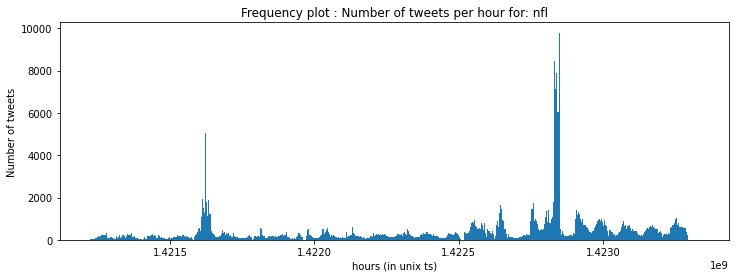

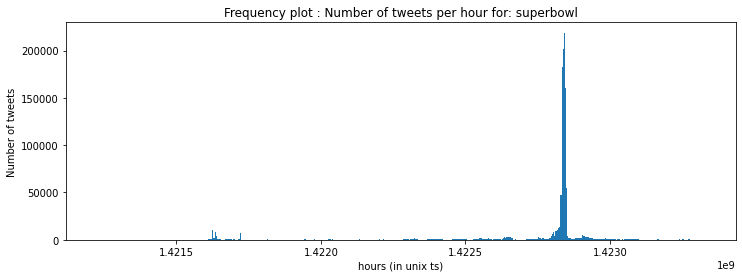

In [38]:
tags = [ 'nfl', 'superbowl']

for tag in tags:
    
    tmp = df[df['file_tag'] == tag]
    plot_tweets_per_hour(tmp, tag)